# Advanced Merging and Concatenating

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

```text
Pandas doesn't provide direct support for filtering joins, but we will learn how to replicate them.
```

## Filtering Joins

### Mutating versus filtering joins
#### Mutating joins:
- Combines data from two tables based on matching observations in both tables.
#### Filtering joins:
- Filter observations from table based on whether or not they match an observation in another table.


### What is  a Semi Join?
<a href="https://ibb.co/fxd1hdx"><img src="https://i.ibb.co/G5QxKQ5/Semi-Join.png" alt="Semi-Join" border="0"></a>


#### Semi Joins:
- Returns the intersection, similar to an inner join
- Returns only columns from the left table and ***not*** the right
- No duplicates


### Example Datasets
<a href="https://ibb.co/N3kzFB4"><img src="https://i.ibb.co/kyrFGCd/Screenshot-2024-12-26-143531.png" alt="Screenshot-2024-12-26-143531" border="0"></a>

<a href="https://ibb.co/5R7nBVR"><img src="https://i.ibb.co/Jshy5Ps/Screenshot-2024-12-26-143910.png" alt="Screenshot-2024-12-26-143910" border="0"></a>

```text
A semi join would return only the columns from the genre table and not the tracks.
```

### Step 1- Semi Join

```python
genres_tracks = genres.merge(top_tracks, on='gid')
print(genres_tracks.head())
```
```text
Merge the two tables with an inner join. We also print the first few rows of the genres_tracks variable. Since this is an inner join, the returned 'gid' column holds only values where both tables matched.
```
<a href="https://ibb.co/0C22f2J"><img src="https://i.ibb.co/9bggqgY/Screenshot-2024-12-26-144045.png" alt="Screenshot-2024-12-26-144045" border="0"></a>


### Step 2 - Semi Join

```python
genres['gid'].isin(genres_tracks['gid'])
```

```text
It uses a method called isin(), which compares every 'gid' in the genres table to the 'gid' in the genres_tracks table.
```

<a href="https://ibb.co/z6y2X9b"><img src="https://i.ibb.co/6X3tH9b/Screenshot-2024-12-26-144315.png" alt="Screenshot-2024-12-26-144315" border="0"></a>

<a href="https://ibb.co/VmZZjTz"><img src="https://i.ibb.co/TLSSvt7/Screenshot-2024-12-26-144458.png" alt="Screenshot-2024-12-26-144458" border="0"></a>


### Step 3 - Semi Join
```python
genres_tracks = genres.merge(top_tracks, on='gid')
top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]
print(top_genres.head())
```

<a href="https://ibb.co/PcHzxLN"><img src="https://i.ibb.co/5rHxT06/Screenshot-2024-12-26-144757.png" alt="Screenshot-2024-12-26-144757" border="0"></a>

```text
To combine everything, we use that line of code to subset the genres table. The results are saved to top_genres and we print a few rows. We've completed a semi join. These are rows in the genre table that are also found in the top_tracks table. This is called a filtering join because we've filtered the genres table by what's in the top_tracks table.
```

### What is an Anti Join
<a href="https://ibb.co/z47RDMs"><img src="https://i.ibb.co/0GFMv7q/Screenshot-2024-12-26-145830.png" alt="Screenshot-2024-12-26-145830" border="0"></a>

```text
An anti join returns the observations in the left table that do not have a matching observation in the right table.
```

#### Anti join
- Returns the left table, excluding the intersection
- Returns only columns from the left table and not the right

```text
Now, let's go back to our example. Instead of finding which genres are in the table of top tracks, let's now find which genres are not with an anti join.
```

#### Step 1 - anti join

```python
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)
print(genres_tracks.head())
```

<a href="https://ibb.co/Jr3sxjt"><img src="https://i.ibb.co/nQPL3Mm/Screenshot-2024-12-26-150016.png" alt="Screenshot-2024-12-26-150016" border="0"></a>


- Use a left join returning all of the rows from the left table.
- Use the indicator argument and set it to True.
- With indicator set to True, the merge method adds a column called "_merge" to the output.


#### Step 2 - Anti Join

```python
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid']
print(gid_list.head())
```
```text
we use the "loc" accessor and "_merge" column to select the rows that only appeared in the left table and return only the "gid" column from the genres_tracks table.
```

| 23 | 5  |
|----|----|
| 34 | 9  |
| 36 | 11 |
| 37 | 12 |
| 38 | 13 |

`Name: gid, dtype:int64`

#### Step 3 - Anti Join

```python
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only','gid']
non_top_genres = genres[genres['gid'].isin(gid_list)]
print(non_top_genres.head())
```

```text
In our final step we use the isin() method to filter for the rows with gids in our gid_list. Our output shows those genres not in the tracks table.
```

<a href="https://ibb.co/Y7z3GNy"><img src="https://i.ibb.co/bgSPn62/Screenshot-2024-12-26-150621.png" alt="Screenshot-2024-12-26-150621" border="0"></a>

### Steps of a semi join

In the last video, you were shown how to perform a semi join with `pandas`. In this exercise, you'll solidify your understanding of the necessary steps. Recall that a semi join filters the left table to only the rows where a match exists in both the left and right tables.

#### **Instructions**  **100XP**

* Sort the steps in the correct order of the technique shown to perform a semi join in `pandas`.

<a href="https://ibb.co/J3NgM7v"><img src="https://i.ibb.co/mNmgMq9/Screenshot-2024-12-29-103155.png" alt="Screenshot-2024-12-29-103155" border="0"></a>


### Performing an anti join

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are **not** assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables have been provided for you.

#### Instructions 1/3

* Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.


In [1]:
import  pandas as pd

top_cust = pd.read_csv('../data/top_cust.csv')
employees = pd.read_csv('../data/employees.csv')

print(top_cust.head())
print(employees.head())

   cid  srid      fname        lname             phone               fax  \
0    1     3       Luís    Gonçalves  +55(12)3923-5555  +55(12)3923-5566   
1    2     5     Leonie       Köhler    +4907112842222               NaN   
2    3     3   François     Tremblay   +1(514)721-4711               NaN   
3    4     4      Bjørn       Hansen       +4722442222               NaN   
4    5     4  František  Wichterlová     +420241725555     +420241725555   

                      email  
0      luisg@embraer.com.br  
1     leonekohler@surfeu.de  
2       ftremblay@gmail.com  
3     bjorn.hansen@yahoo.no  
4  frantisekw@jetbrains.com  
   srid    lname     fname                title   hire_date  \
0     1    Adams    Andrew      General Manager  2002-08-14   
1     2  Edwards     Nancy        Sales Manager  2002-05-01   
2     3  Peacock      Jane  Sales Support Agent  2002-04-01   
3     4     Park  Margaret  Sales Support Agent  2003-05-03   
4     5  Johnson     Steve  Sales Support Agent 

In [2]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator= True)
empl_cust

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55(12)3923-5555,+55(12)3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1(514)721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55(21)2271-7000,+55(21)2271-7070,roberto.almeida@riotur.gov.br,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com,54.0,Steve,Murray,+4401313153300,NaN,steve.murray@yahoo.uk,both
60,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com,57.0,Luis,Rojas,+56(0)26354444,NaN,luisrojas@yahoo.cl,both
61,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only


### **Instructions 2/3**
- Select the srid column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.

In [3]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid',
                            how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

### Instruction 3/3

* Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.


In [4]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid',
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


## Performing a semi join

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

### Instructions

**100 XP**

* Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
* Use `.isin()` to subset the rows of `non_mus_tcks` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
* Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
* Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.


In [8]:
non_mus_tcks = pd.read_csv('../data/non_mus_tcks.csv')
genres = pd.read_csv('../data/genres.csv')
top_invoices = pd.read_csv('../data/top_invoices.csv')

In [9]:
# Merge the non_mus_tcks and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

   gid  tid      name
0   19    1  TV Shows
1   21    1     Drama


## Concatenate two tables vertically
-  pandas `.concat()` method can concatenate both vertical and horizontal.
    `axis=0` , vertical

## Basic concatenation
 - 3 different tables
 - Same column names
 - Table variable names:
    - `inv_jan` (top)
    - `inv_feb` (middle)
    - `inv_mar` (bottom)

```python
# Basic concatenation
pd.concat([inv_jan, inv_feb, inv_mar])
```
### Ignoring the index
```python
pd.concat([inv_jan, inv_feb, inv_mar],  ignore_index=True)
```

### Setting labels to original tables
```python
pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=False, keys=['jan','feb','mar'])
```
### Concatenate tables with different column names
Table: `inv_jan`
Table: `inv_feb`

#### Concatenate tables with different column names
```python
pd.concat([inv_jan, inv_feb], sort=True)
```

### Concatenate tables with different column names
```python
pd.concat([inv_jan, inv_feb], join='inner')
```
```text
If we only want the matching columns between tables, we can set the join argument to "inner". Its default value is equal to "outer", which is why concat by default will include all of the columns. Additionally, the sort argument has no effect when join equals "inner". The order of the columns will be the same as the input tables. Now the bill country column is gone and we're only left with the columns the tables have in common.
```


## Concatenation basics

You have been given a few tables of data with musical track info for different albums from the metal band, *Metallica* . The track info comes from their *Ride The Lightning* , *Master Of Puppets* , and *St. Anger* albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

### Instructions 1/3

**30 XP**
  * Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.


In [10]:
tracks_master = pd.read_csv('../data/tracks_master.csv')
tracks_ride = pd.read_csv('../data/tracks_ride.csv')
tracks_st = pd.read_csv('../data/tracks_st.csv')

In [12]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print(tracks_from_albums)
tracks_from_albums

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


### Instructions **2/3**
* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.


In [13]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)
tracks_from_albums

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99
5,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,154,NaN,3,1,Fade To Black,1877,0.99
7,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. Anger,1883,0.99


### Instructions **3/3**
* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.


In [15]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)
tracks_from_albums

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


### Concatenating with keys

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

#### Instructions

**100 XP**

* Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as `keys` for their respective months, and save to `inv_jul_thr_sep`.
* Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
* Create a bar chart of `avg_inv_by_month`.


In [16]:
inv_jul = pd.read_csv('../data/inv_jul.csv')
inv_aug = pd.read_csv('../data/inv_aug.csv')
inv_sep = pd.read_csv('../data/inv_sep.csv')

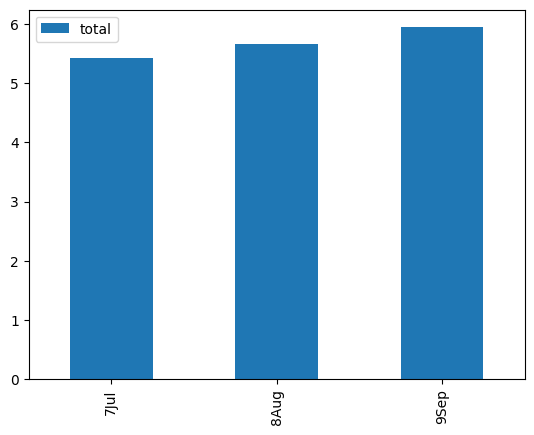

In [19]:
import matplotlib.pyplot as plt
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

# Verifying Integrity

##  Possible merging issue:
- Unintentional one-to-many relationship
- Unintentional many-to-many relationship

## Possible concatenating issue:
-  Duplicate records possibly unintentionally introduced

## Validating merges
`.merge(validate=None)`:

- Checks if merge is of specified type
- `'one_to_one'`
- `'one_to_many'`
- `'many_to_one'`
- `'many_to_many'`

### Merge dataset for example

- Table Name: `tracks`
- Table Name: `specs`

### Merge validate: one_to_one
```python
tracks.merge(specs, on='tid',  validate='one_to_one')
```
```shell
Traceback (most recent call last):
MergeError: Merge keys are not unique in right dataset; not a one-to-one merge
```

### Merge validate: one_to_many
```python
albums.merge(tracks, on='aid',  validate='one_to_many')
```

### Verifying concatenations
```python
.concat(verify_integrity=False)
```

- Check whether the new concatenated index contains duplicates
- Default value is `False`

### Dataset for `.concat()` example

Table Name: `inv_feb`
Table Name: `inv_mar`

#### Verifying concatenation: example
```python
pd.concat([inv_feb, inv_mar], verify_integrity=True)
```
```python
pd.concat([inv_feb, inv_mar], verify_integrity=False)
```

### Why verify integrity and what to do

Why:
- Real world data is often **NOT** clean

What to do:
- Fix incorrect data
- Drop duplicate rows

```text
Often our data is not clean, and it may not always be evident if data has the expected structure. Therefore, verifying this structure is useful, saving us from having a mean skewed by duplicate values, or from creating inaccurate plots. If you receive a MergeError or a ValueError, you can fix the incorrect data or drop duplicate rows. In general, you should look to correct the issue.
```


## Validating a merge

You have been given 2 tables, `artists`, and `albums`. Merge them using `artists.merge(albums, on='artid').head()`, adjusting the `validate` argument to determine which statement is ***False*** .


### Possible answers

1. You can use `'many_to_many'` without an error, since there is a duplicate key in one of the tables.
2. You can use `'one_to_many'` without error, since there is a duplicate key in the right table.
3. You can use `'many_to_one'` without an error, since there is a duplicate key in the left table.

Correct Answer is ***`3`***


## Concatenate and merge to find common songs

The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you. Additionally, `pandas` has been loaded as `pd`.

### Instructions 1/2

**50 XP** 1/2

* Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
* Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.


In [25]:
classic_18 = pd.read_csv('../data/classic_18.csv')
classic_19 = pd.read_csv('../data/classic_19.csv')
pop_18 = pd.read_csv('../data/pop_18.csv')
pop_19 = pd.read_csv('../data/pop_19.csv')

In [26]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)
classic_18_19

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440
5,12,3414
6,12,3433
7,12,3491
8,12,3422
9,12,3417


In [27]:
pop_18_19

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919
...,...,...
205,1,2942
206,1,2463
207,1,2459
208,1,1540


## Instructions 2/2

* With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join.
* Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.


In [28]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
10   12  3439
21   12  3445
23   12  3449
35   12  3439
46   12  3445
48   12  3449


# **Completed**